In [3]:
!pip install matplotlib

     |████████████████████████████████| 7.2 MB 424 kB/s eta 0:00:01
     |████████████████████████████████| 61 kB 352 kB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 1.0 MB/s eta 0:00:01


In [5]:
!pip install squarify

In [61]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

In [7]:
df = pd.read_csv('transaction.csv', encoding = "ISO-8859-1")
# Convert InvoiceDate from object to datetime format
df['createdAt'] = pd.to_datetime(df['createdAt'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256334 entries, 0 to 256333
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   payerAccountNumber      256294 non-null  float64       
 1   status                  256334 non-null  int64         
 2   originalAmount          256334 non-null  float64       
 3   type                    256334 non-null  int64         
 4   currency                256334 non-null  int64         
 5   createdAt               256334 non-null  datetime64[ns]
 6   payeeIdTransformed      256334 non-null  int64         
 7   payerIdTransformed      256334 non-null  int64         
 8   is_fraud                256334 non-null  int64         
 9   amount_high             256334 non-null  int64         
 10  bank_approved           256334 non-null  int64         
 11  bank_err                256334 non-null  int64         
 12  bank_invalid_card       256334

In [13]:
#get the snpshot of date 
snapshot_date = df['createdAt'].max() + timedelta(days=1)
print(snapshot_date)


2021-04-27 14:26:05


In [71]:
# Grouping by payer Id
data_process = df.groupby(['payerIdTransformed','payerAccountNumber']).agg({
        'createdAt': lambda x: (snapshot_date - x.max()).days,
        'payerAccountNumber': 'count',
        'originalAmount': 'sum',
        'bank_approved':'sum',
        'bank_err':'sum',
        'bank_invalid_card':'sum',
        'bank_insufficient_fund':'sum',
        'bank_do_not_honor':'sum',
        'bank_lost_card':'sum',
        'amount_high':'sum',
        'is_fraud':'sum',
        'channel_master':'sum',
        'channel_visa':'sum',
        'channel_amex':'sum',
})

In [72]:
# Rename the columns 
data_process.rename(columns={'createdAt': 'recency',
                         'payerAccountNumber': 'frequency',
                         'originalAmount': 'total_value'}, inplace=True)

In [73]:
data_process.head(10)

recency  frequency  total_value  \
payerIdTransformed payerAccountNumber                                    
170                4.216892e+09            124         34     213542.0   
                   4.691767e+09            256          6        611.0   
171                4.157394e+09            261          3         30.0   
                   4.216892e+09            235          6        561.0   
172                4.511936e+09            258         12       1316.0   
173                4.216892e+09            255          9        180.0   
174                5.404507e+09            126         11     221198.0   
175                4.216892e+09            235          4      20080.0   
176                5.288431e+09            190          4     130735.0   
                   5.290917e+09            240          2         20.0   

                                       bank_approved  bank_err  \
payerIdTransformed payerAccountNumber                            
170                4.216892e+09                   18         0   
                   4.691767e+09                    0         0   
171                4.157394e+09                    1         0   
                   4.216892e+09                    3         0   
172                4.511936e+09                    1         0   
173                4.216892e+09                    7         0   
174                5.404507e+09                    0         0   
175                4.216892e+09                    3         0   
176                5.288431e+09                    2         0   
                   5.290917e+09                    0         0   

                                       bank_invalid_card  \
payerIdTransformed payerAccountNumber                      
170                4.216892e+09                        4   
                   4.691767e+09                        0   
171                4.157394e+09                        0   
                   4.216892e+09                        0   
172                4.511936e+09                        0   
173                4.216892e+09                        0   
174                5.404507e+09                        3   
175                4.216892e+09                        0   
176                5.288431e+09                        0   
                   5.290917e+09                        0   

                                       bank_insufficient_fund  \
payerIdTransformed payerAccountNumber                           
170                4.216892e+09                             1   
                   4.691767e+09                             1   
171                4.157394e+09                             0   
                   4.216892e+09                             0   
172                4.511936e+09                             0   
173                4.216892e+09                             0   
174                5.404507e+09                             1   
175                4.216892e+09                             0   
176                5.288431e+09                             0   
                   5.290917e+09                             0   

                                       bank_do_not_honor  bank_lost_card  \
payerIdTransformed payerAccountNumber                                      
170                4.216892e+09                       11               0   
                   4.691767e+09                        5               0   
171                4.157394e+09                        2               0   
                   4.216892e+09                        3               0   
172                4.511936e+09                       11               0   
173                4.216892e+09                        2               0   
174                5.404507e+09                        7               0   
175                4.216892e+09                        1               0   
176                5.288431e+09                        2               0   
                   

In [74]:
data_process.to_csv('transaction_data_process.csv',index=False)

In [56]:
print('{:,} rows; {:,} columns'
      .format(data_process.shape[0], data_process.shape[1]))

41,276 rows; 14 columns


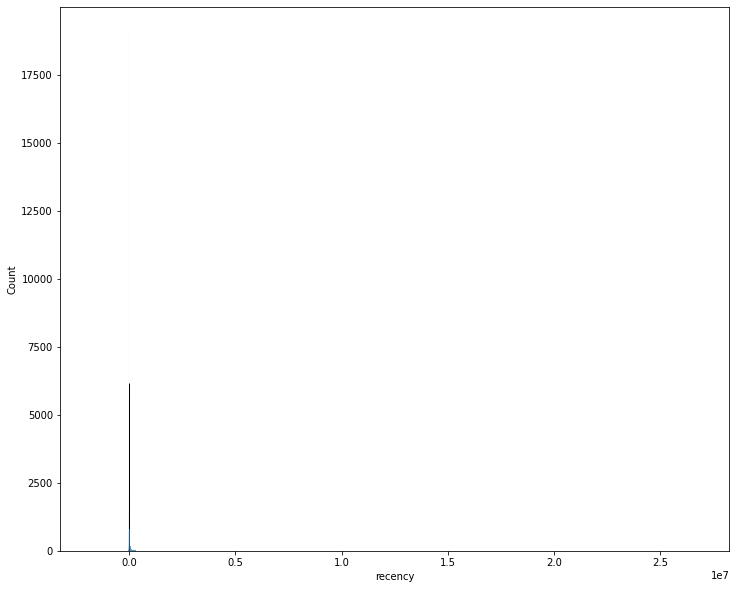

In [78]:

plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.histplot(data_process['recency'])

# Plot distribution of F
plt.subplot(3, 1, 2); sns.histplot(data_process['frequency'])

# Plot distribution of M
plt.subplot(3, 1, 3); sns.histplot(data_process['total_value'])

plt.show()

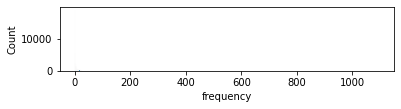